### Analise de número da MegaSena

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***Carrega os dados***

In [201]:
history_df = pd.read_csv("mega_sena_history.txt", sep=" ", header=None) #header=None if no header row

history_df.head()

,0,1,2,3,4,5
0,41,5,4,52,30,33
1,9,39,37,49,43,41
2,36,30,10,11,29,47
3,6,59,42,27,1,5
4,1,19,46,6,16,2


***Distrbuição Normal de dados históricos***

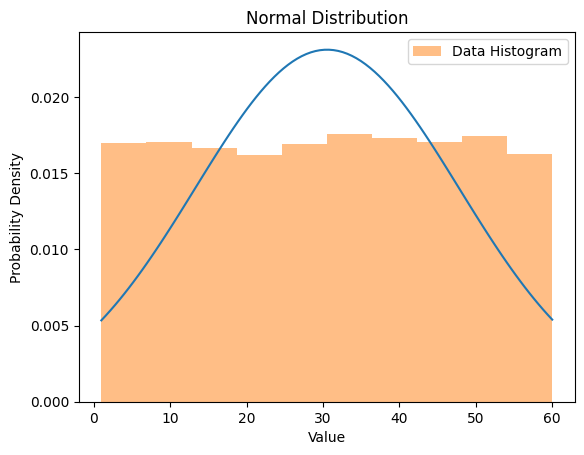

In [202]:
numbers = np.hstack(history_df.iloc[:,0:].values)
# --- Statistical Calculations ---
mean = np.mean(numbers)
std = np.std(numbers)

# --- Generate Normal Distribution ---
x = np.linspace(min(numbers), max(numbers), 100) #100 data points to generate a smooth curve
y = (1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2)))

# --- Plotting ---
plt.plot(x, y)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.hist(numbers, density=True, alpha=0.5, label='Data Histogram') #Show data's histogram to compare
plt.legend()
plt.show()

#Pandas is not strictly needed to plot.  You could add this if you wish to keep your numbers in a dataFrame:
numbers_df = pd.DataFrame({'numbers':numbers})

In [203]:
# dezenas mais frequentes na Mega-Sena
most_frequency=numbers_df.groupby('numbers').size().reset_index(name='counts').sort_values('counts', ascending=False)
most_frequency.head(6).reset_index(drop=True)

,numbers,counts
0,10,328
1,53,319
2,33,304
3,34,304
4,5,302
5,37,302


### Montanto sequências de jogadas

***Procura aleatória por sequencias que nunca sairam***

In [204]:
import random
def generate_unique_combination(history, disponible_numbers= range(1, 61)):
    """Generates a new Mega-Sena combination not in the history."""
    while True:
        combination = sorted(random.sample(disponible_numbers, 6)) 
        found_sentence = history_df.apply(lambda row: all(row.sort_values() == combination), axis=1)

        if True not in found_sentence:
            return combination

for i in range(10): 
    new_combination = generate_unique_combination(history_df.values)
    print(f"New combination: {new_combination}")

New combination: [12, 21, 28, 41, 43, 56]
New combination: [19, 23, 26, 29, 44, 51]
New combination: [8, 22, 23, 29, 32, 48]
New combination: [3, 23, 31, 33, 35, 46]
New combination: [3, 18, 35, 37, 40, 59]
New combination: [2, 10, 14, 28, 56, 57]
New combination: [13, 15, 18, 24, 26, 51]
New combination: [3, 6, 21, 38, 43, 47]
New combination: [2, 12, 13, 23, 39, 59]
New combination: [31, 33, 36, 44, 48, 54]


***Procurar sequencias que nunca sairam, com base nos 10 números mais frequentes***

In [205]:
# procura sequencias que nunca sairam, com base nos 10 números mais frequentes  
print('Números disponíveis',  most_frequency.head(10)['numbers'].values.tolist()) 
for i in range(10): 
    new_combination = generate_unique_combination(history_df.values, disponible_numbers=  most_frequency.head(10)['numbers'].values.tolist())
    print(f"New combination: {new_combination}")

Números disponíveis [10, 53, 33, 34, 5, 37, 42, 23, 44, 32]
New combination: [5, 10, 32, 33, 44, 53]
New combination: [10, 23, 32, 33, 34, 53]
New combination: [5, 23, 32, 34, 44, 53]
New combination: [5, 10, 32, 37, 42, 44]
New combination: [5, 23, 34, 37, 42, 44]
New combination: [10, 23, 32, 33, 37, 44]
New combination: [23, 32, 33, 37, 42, 44]
New combination: [5, 33, 34, 42, 44, 53]
New combination: [5, 23, 32, 33, 34, 53]
New combination: [5, 23, 32, 33, 34, 42]


***Procurar sequencias que nunca sairam, com base nos 10 números menos frequentes***

In [206]:
print('Números disponíveis',  most_frequency.tail(10)['numbers'].values.tolist()) 
for i in range(10): 
    new_combination = generate_unique_combination(history_df.values, disponible_numbers=  most_frequency.head(10)['numbers'].values.tolist())
    print(f"New combination: {new_combination}")

Números disponíveis [9, 40, 3, 48, 31, 22, 15, 55, 21, 26]
New combination: [10, 23, 34, 37, 42, 44]
New combination: [10, 23, 32, 33, 34, 42]
New combination: [10, 23, 32, 33, 34, 37]
New combination: [5, 23, 32, 33, 37, 42]
New combination: [5, 23, 32, 34, 42, 53]
New combination: [10, 23, 32, 33, 42, 53]
New combination: [5, 32, 33, 34, 37, 42]
New combination: [5, 23, 32, 33, 34, 37]
New combination: [32, 33, 34, 37, 42, 53]
New combination: [23, 32, 33, 34, 42, 53]


***Procurar sequencias que nunca sairam, com base nos 20 números menos frequentes e mais frequentes***

In [207]:
used_numbers= np.append(most_frequency.head(20)['numbers'].values, most_frequency.tail(20)['numbers'].values).tolist()
print('Números disponíveis',  used_numbers) 
for i in range(10): 
    new_combination = generate_unique_combination(history_df.values, disponible_numbers=  used_numbers)
    print(f"New combination: {new_combination}")

Números disponíveis [10, 53, 33, 34, 5, 37, 42, 23, 44, 32, 30, 38, 35, 17, 43, 41, 11, 4, 27, 16, 58, 1, 19, 57, 47, 60, 18, 39, 12, 7, 9, 40, 3, 48, 31, 22, 15, 55, 21, 26]
New combination: [11, 41, 44, 48, 53, 55]
New combination: [7, 12, 17, 22, 26, 39]
New combination: [22, 31, 33, 35, 37, 58]
New combination: [10, 11, 12, 16, 34, 43]
New combination: [12, 18, 40, 48, 55, 60]
New combination: [11, 16, 31, 32, 41, 47]
New combination: [3, 9, 17, 26, 44, 57]
New combination: [16, 30, 32, 34, 39, 41]
New combination: [1, 17, 19, 27, 34, 47]
New combination: [3, 23, 26, 39, 48, 55]


***Procurar sequencias que nunca sairam, com base em uma lista de 10 números favoritos***

In [208]:
used_numbers= [4,7,10,22,26,29,41,45,47,55]
print('Números disponíveis',  used_numbers) 
for i in range(10): 
    new_combination = generate_unique_combination(history_df.values, disponible_numbers=  used_numbers)
    print(f"New combination: {new_combination}")

Números disponíveis [4, 7, 10, 22, 26, 29, 41, 45, 47, 55]
New combination: [7, 10, 22, 41, 45, 55]
New combination: [4, 10, 26, 41, 45, 47]
New combination: [4, 10, 26, 29, 45, 55]
New combination: [4, 7, 22, 45, 47, 55]
New combination: [4, 7, 22, 29, 41, 45]
New combination: [4, 7, 10, 26, 29, 41]
New combination: [7, 10, 22, 29, 45, 47]
New combination: [4, 10, 26, 29, 45, 55]
New combination: [7, 10, 29, 41, 45, 47]
New combination: [4, 10, 22, 26, 47, 55]
